In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/sales_data_with_discounts.csv')

In [4]:
print("Data Info")
df.info()

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [5]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [6]:
df.columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [9]:
numerical_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_columns=df.select_dtypes(include=['object','category']).columns.tolist()

In [10]:
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']
Categorical Columns: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


In [14]:
for column in numerical_columns:
    print(f"\nStatistics for {column}:")
    print(f"Mean: {df[column].mean()}")
    print(f"Median: {df[column].median()}")
    print(f"Mode: {df[column].mode().iloc[0]}")
    print(f"Standard Deviation: {df[column].std()}")


Statistics for Volume:
Mean: 5.066666666666666
Median: 4.0
Mode: 3
Standard Deviation: 4.231602391213926

Statistics for Avg Price:
Mean: 10453.433333333332
Median: 1450.0
Mode: 400
Standard Deviation: 18079.90483993645

Statistics for Total Sales Value:
Mean: 33812.83555555555
Median: 5700.0
Mode: 24300
Standard Deviation: 50535.07417255328

Statistics for Discount Rate (%):
Mean: 15.155241895330914
Median: 16.57776564929597
Mode: 5.007822189204133
Standard Deviation: 4.220602153325511

Statistics for Discount Amount:
Mean: 3346.499424342415
Median: 988.9337332382784
Mode: 69.17794228822787
Standard Deviation: 4509.9029633539985

Statistics for Net Sales Value:
Mean: 30466.336131270138
Median: 4677.788059301853
Mode: 326.97480055470817
Standard Deviation: 46358.656624066934


In [ ]:
	# Provide a brief interpretation of these statistics.

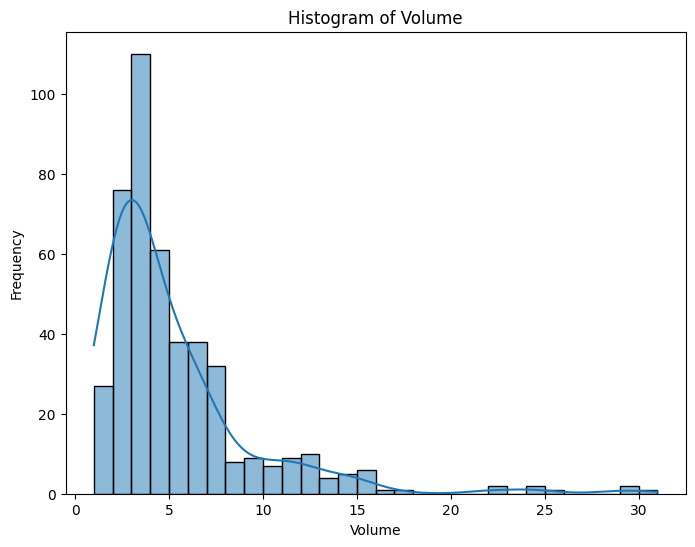

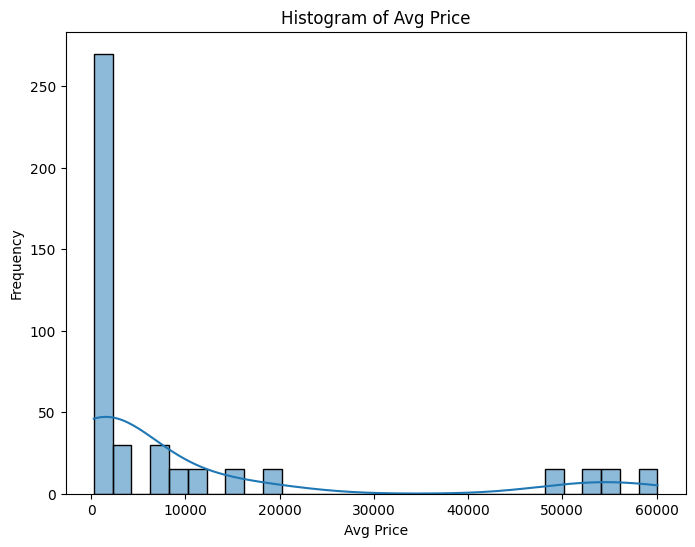

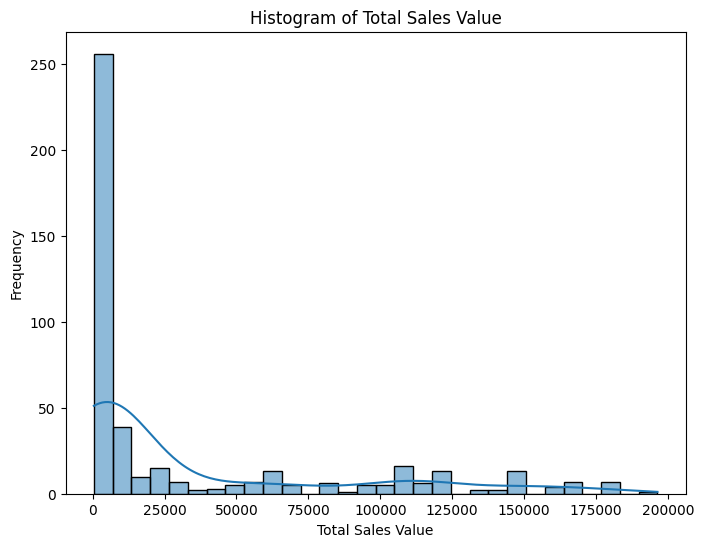

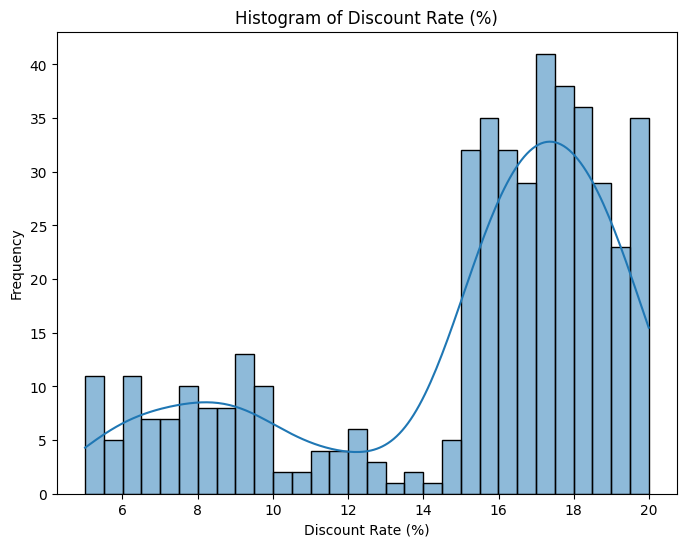

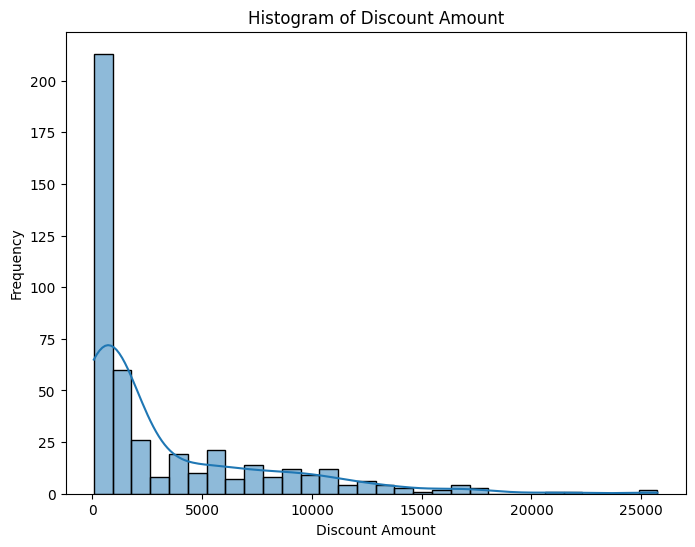

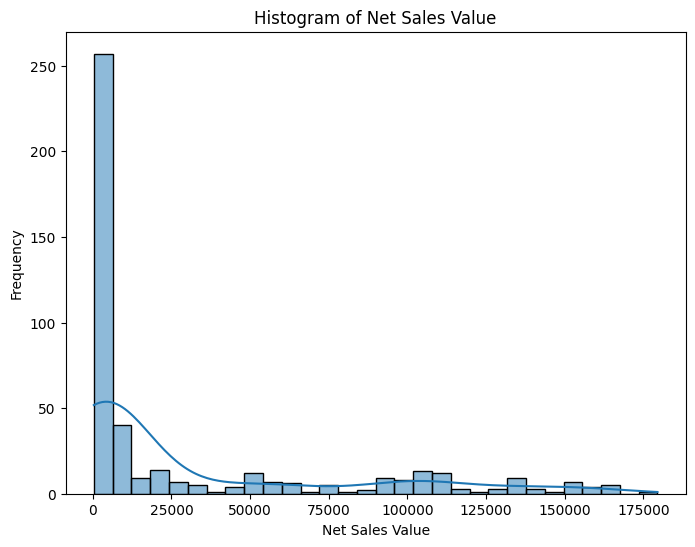

In [19]:
# Data Visualization
# Histograms
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


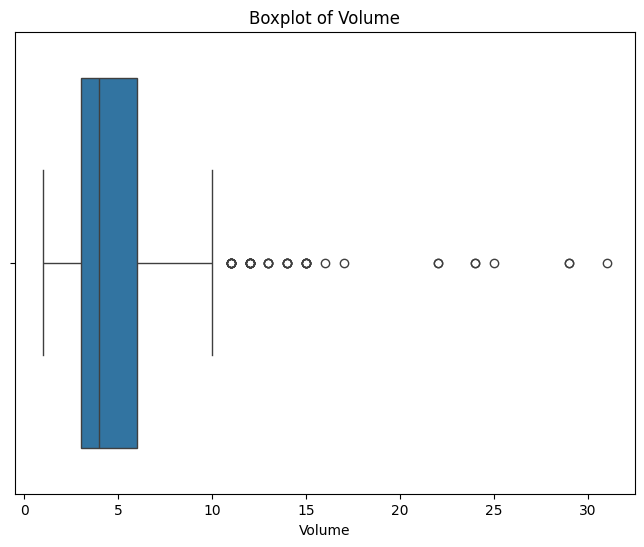

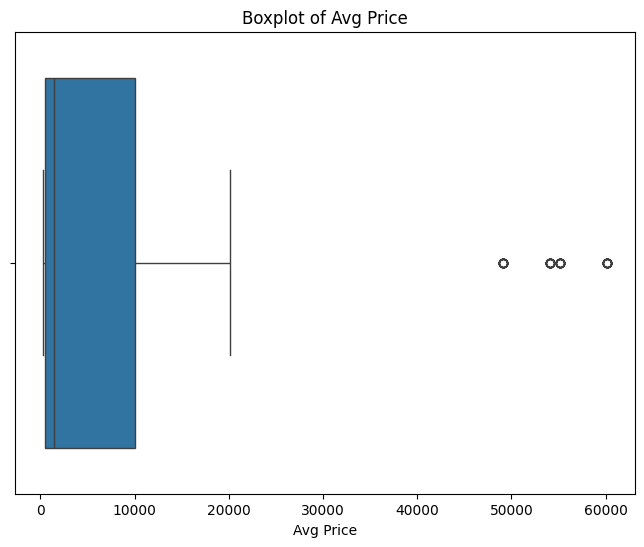

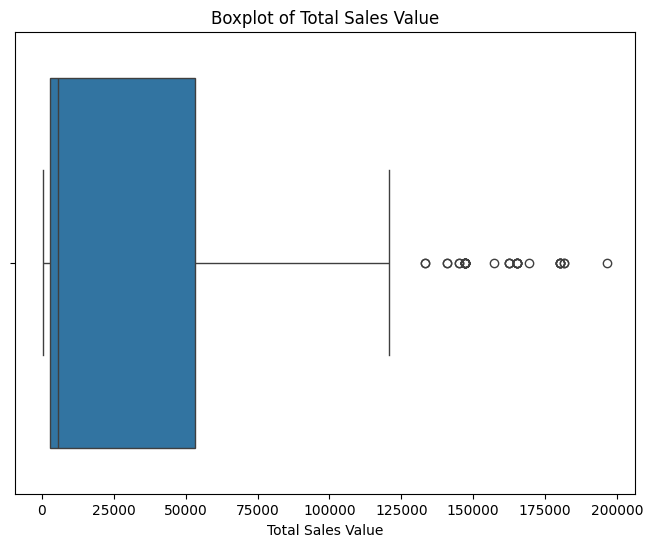

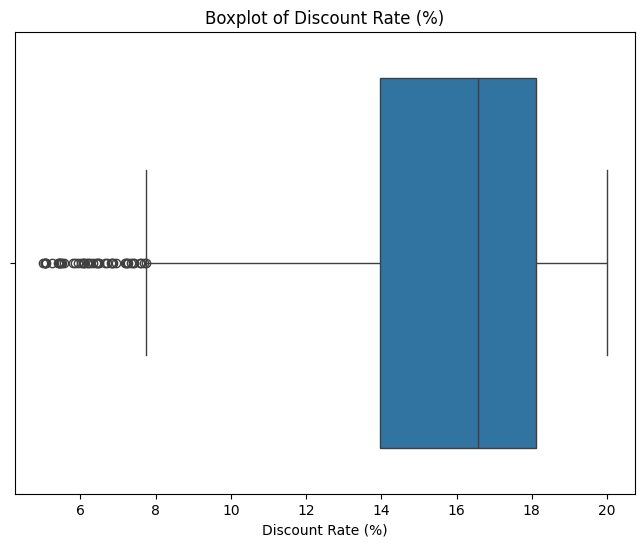

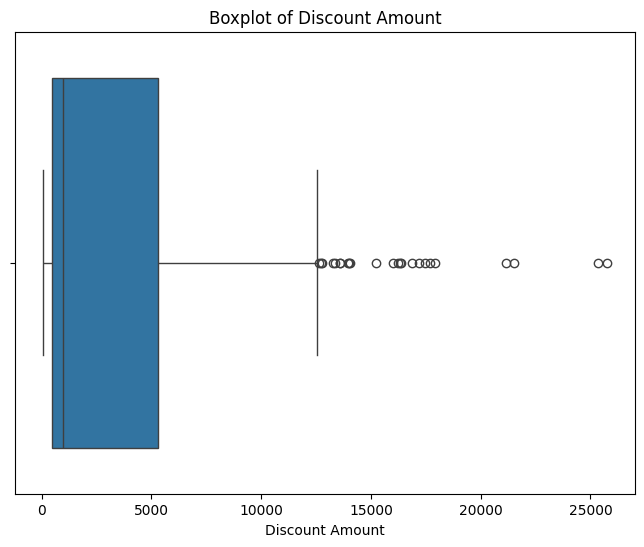

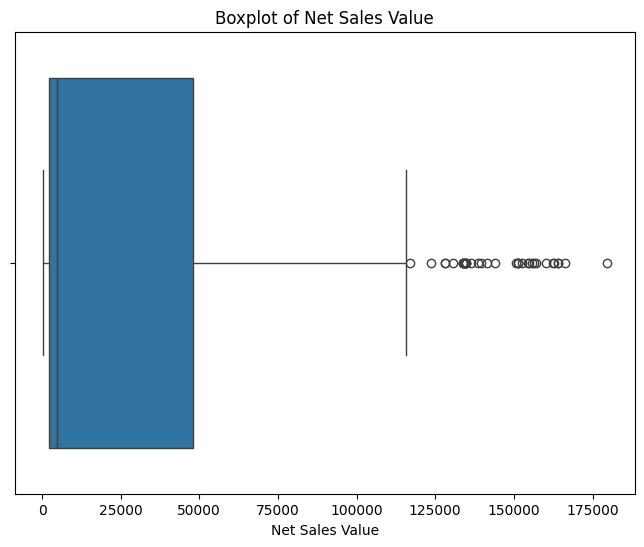

In [20]:
# Boxplot
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

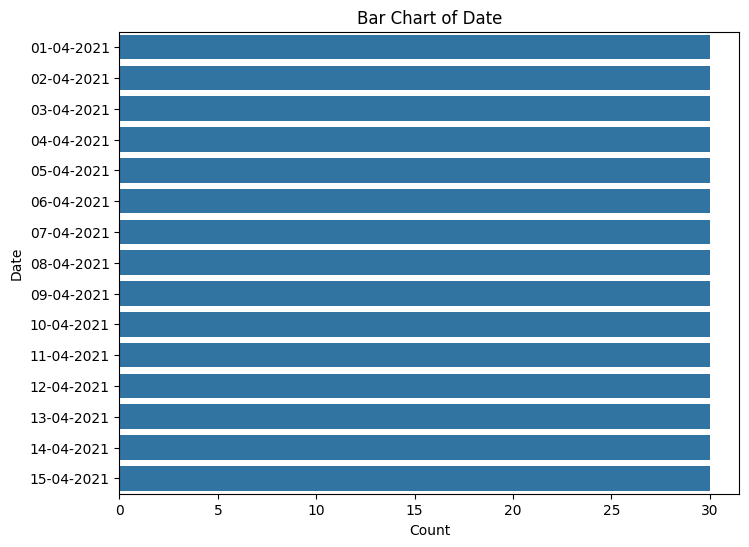

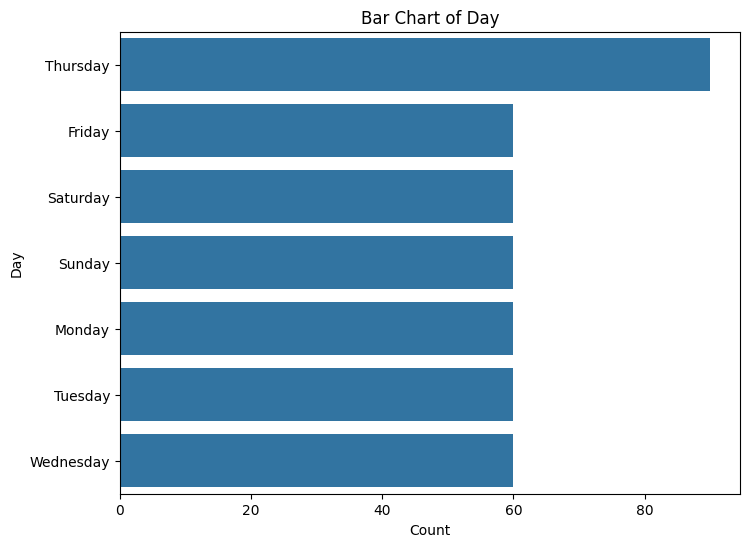

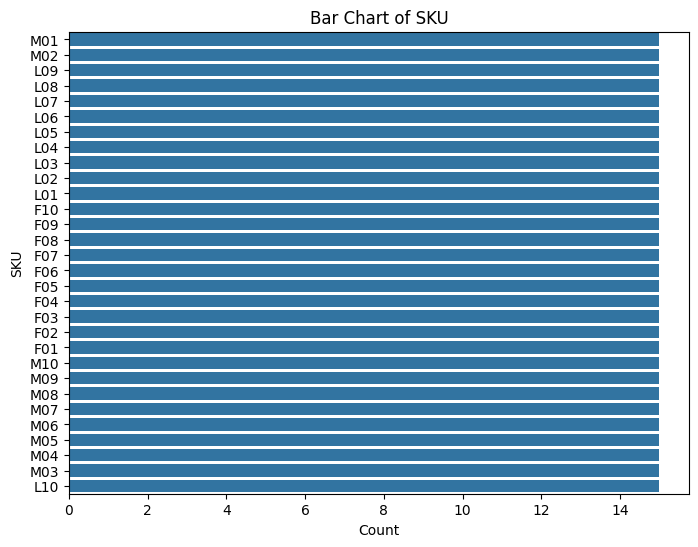

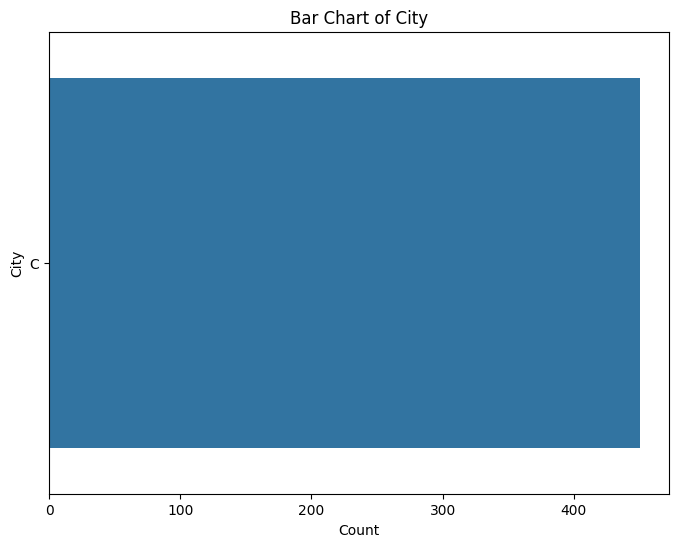

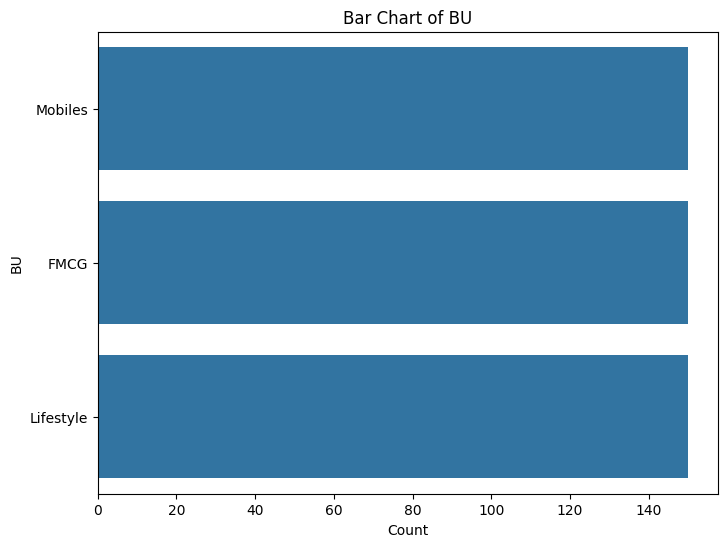

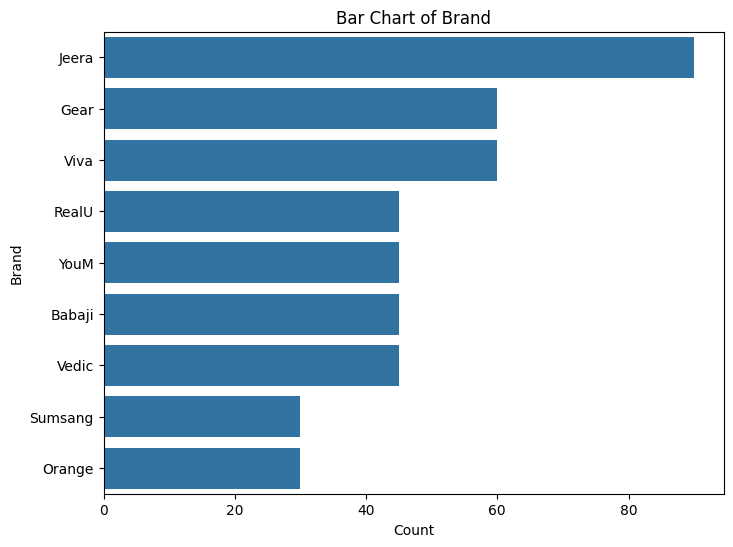

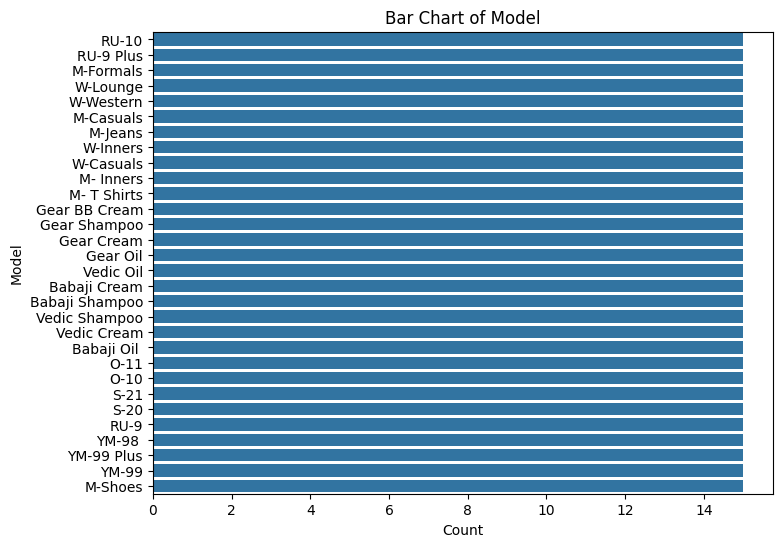

In [22]:
# Bar charts
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(y=df[column], order=df[column].value_counts().index)
    plt.title(f"Bar Chart of {column}")
    plt.xlabel("Count")
    plt.ylabel(column)
    plt.show()

In [25]:
# Standardization of Numerical Variables
def standardize(column):
    return (column - column.mean()) / column.std()

standardized_data = df[numerical_columns].apply(standardize)
standardized_data

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.347417,0.091072,2.922469,-0.829365,3.948422,2.801638
1,1.165831,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,0.456880,0.312312,1.561038,-1.350129,1.621190,1.543957
3,0.220563,0.533552,1.717365,-1.947555,1.112568,1.763847
4,-0.488389,-0.130168,-0.188242,0.672990,0.227598,-0.227342
...,...,...,...,...,...,...
445,-0.724706,-0.506277,-0.617647,0.075924,-0.652815,-0.609783
446,0.220563,-0.434374,-0.360400,0.450596,-0.152022,-0.378079
447,-0.724706,-0.489684,-0.605774,0.902788,-0.607464,-0.601252
448,-0.488389,-0.473091,-0.556303,0.388042,-0.529789,-0.554881


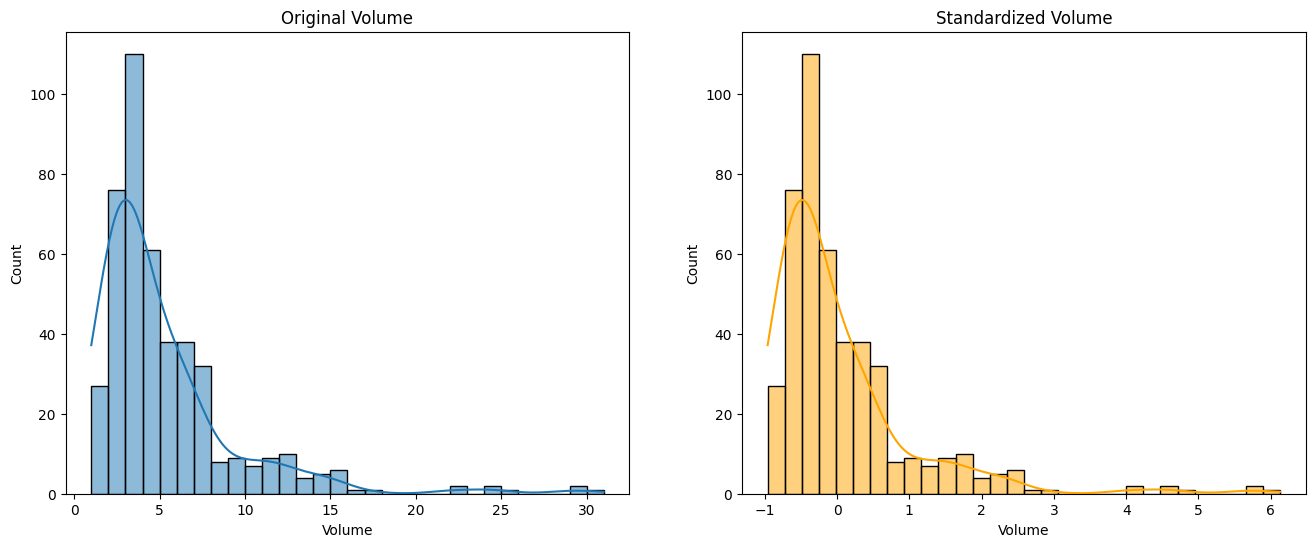

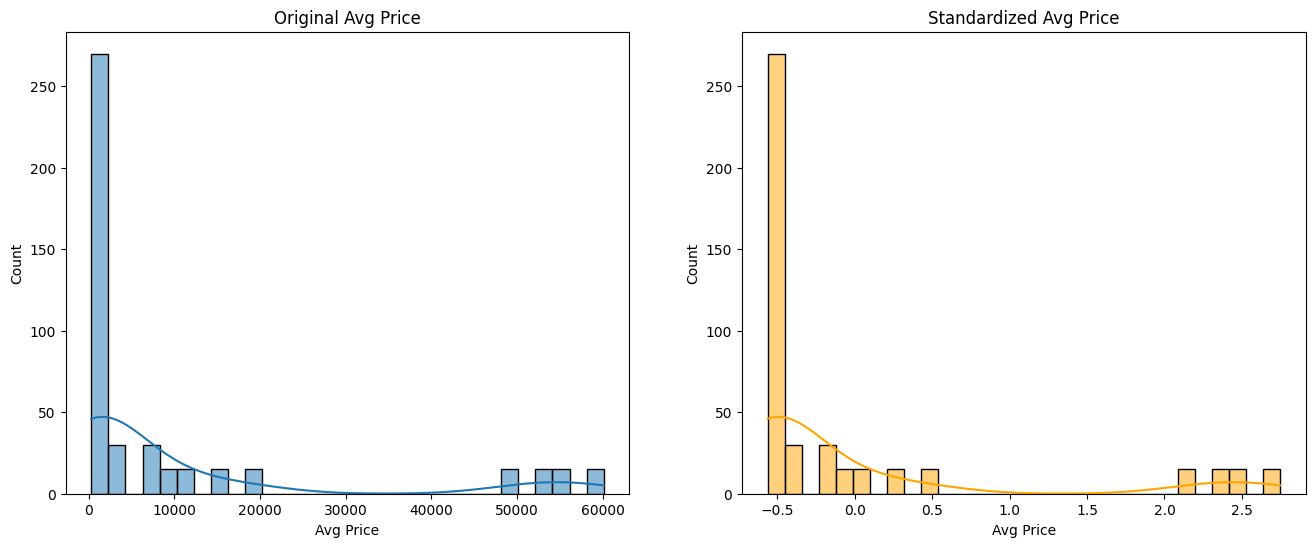

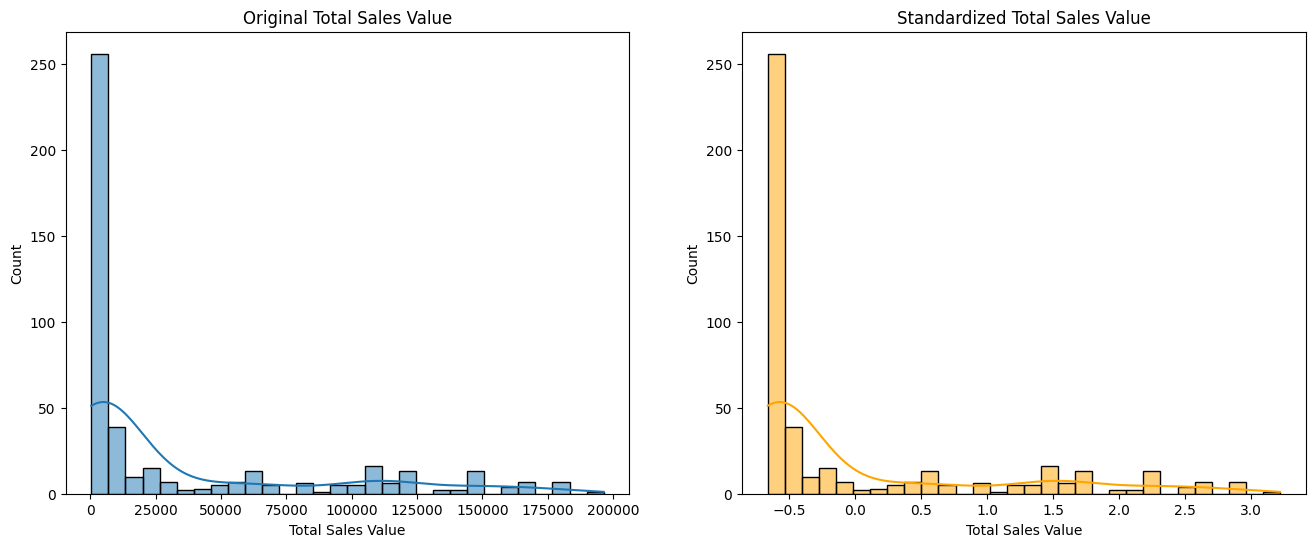

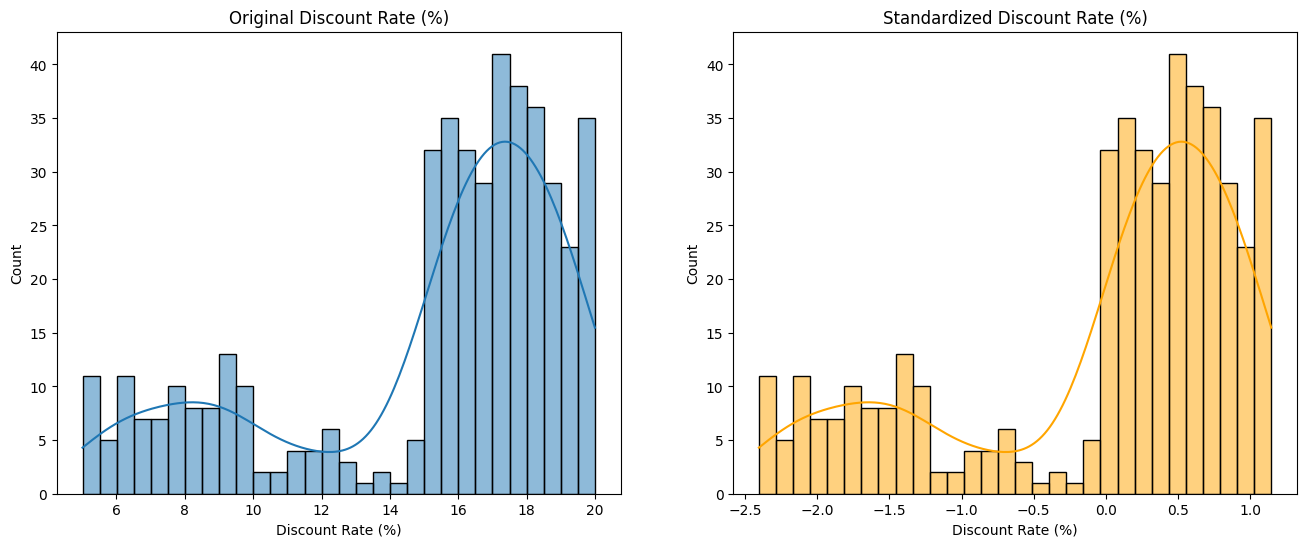

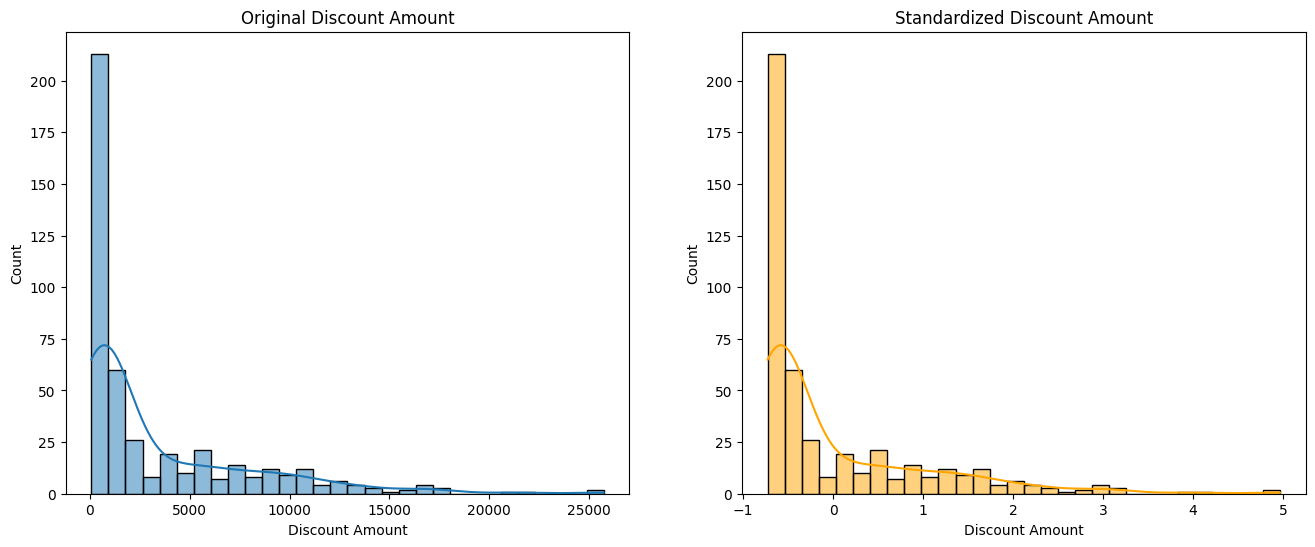

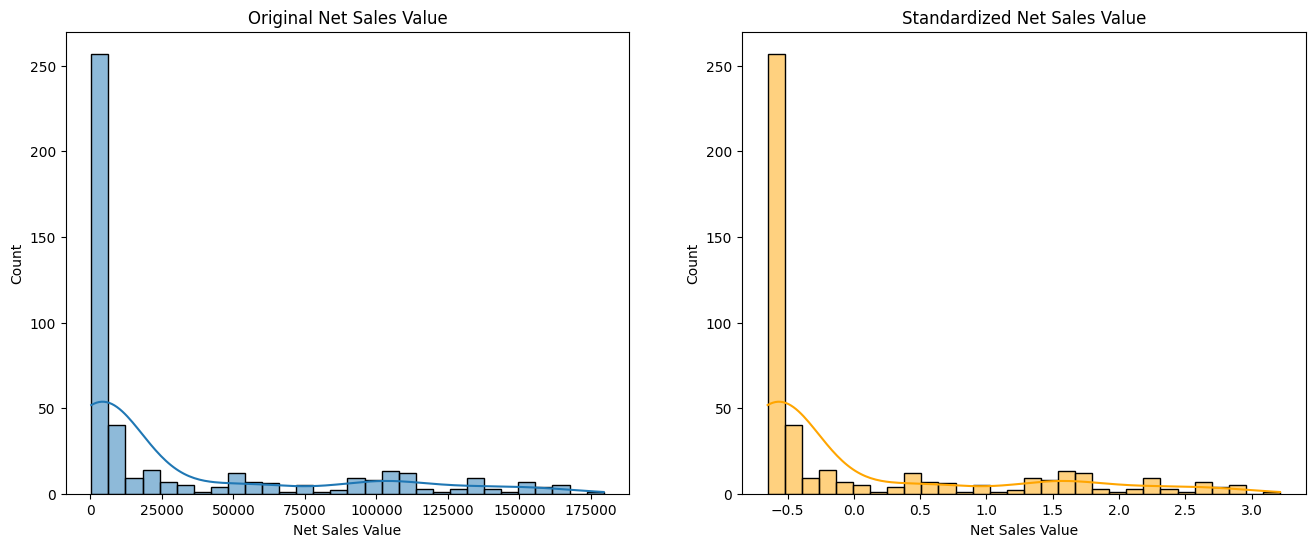

In [27]:
# Comparison before and after standardization
for column in numerical_columns:
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f"Original {column}")

    plt.subplot(1, 2, 2)
    sns.histplot(standardized_data[column], kde=True, bins=30, color='orange')
    plt.title(f"Standardized {column}")
    plt.show()

In [29]:
# Conversion of Categorical Data into Dummy Variables
# One-hot encoding
encoded_data = pd.get_dummies(df, columns=categorical_columns)

print("\nDataset after One-Hot Encoding:")
print(encoded_data.head())


Dataset after One-Hot Encoding:
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0    160346.501180             True            False            False   
1     89323.897039             True            False            False   
2    102042.089843             True            False            False   
3    112235.925298             True            False            False   
4     19927.053770             True            False            False   

   Date_04-04-2021  ...  Model_Vedic Cream  Model_Ved